### Exploratory Data Analysis on E-Commerce Data from Kaggle
Data obtained from https://www.kaggle.com/datasets/carrie1/ecommerce-data/data. The goal is to do an exploratory data analysis on this dataset to identify certain issues with the data and to troubleshoot if there are any. Note that this exploration is on a cleaned dataset meaning no further cleaning might be needed.

#### Step 1: Initial setup and checks

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Pull in/load downloaded data and check summary statistics
data_df = pd.read_csv(
    'D:/python_projects/ml-projects-portfolio/exploratory_data_analysis/e-commerce_data/data.csv',
    encoding='latin1'
)
display(data_df.head())
#Checking for 
display(data_df.describe())
print(data_df.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


(541909, 8)


#### Step 2: Data Quality Assessment

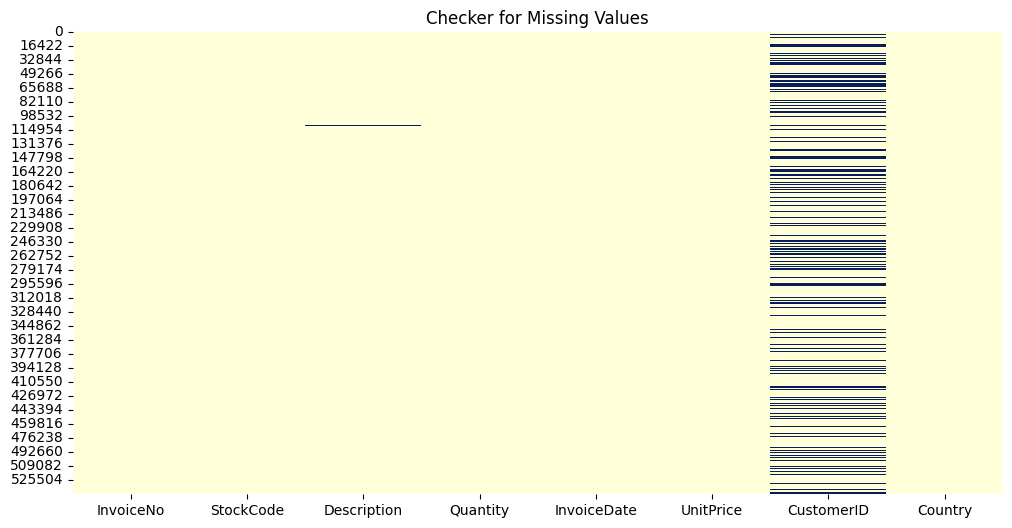

,Missing Count,Missing %
CustomerID,135080,24.926694
Description,1454,0.268311
StockCode,0,0.000000
InvoiceNo,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [ ]:
# Identify the count of missing values per columns
missing_counts = data_df.isnull().sum()
missing_percentage = (data_df.isnull().sum() / len(data_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percentage
}).sort_values(by='Missing %', ascending=False)

#Visualize missing values and display table to check which columns have many missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data_df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Checker for Missing Values")
plt.show()
display(missing_df)

In [ ]:
# Checking column data types to check which needs conversion
data_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [33]:
# Convert InvoiceDate to datetime
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'], errors='coerce')

#Convert to integer to make missing values null
data_df['CustomerID'] = data_df['CustomerID'].astype('Int64')

# To save computational memory
data_df['Country'] = data_df['Country'].astype('category')

data_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country              category
dtype: object

### Univariate Analysis

In [4]:
#Create numerical and categorical cols for easier accessing
numeric_cols = data_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [6]:
data_df[numeric_cols].describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


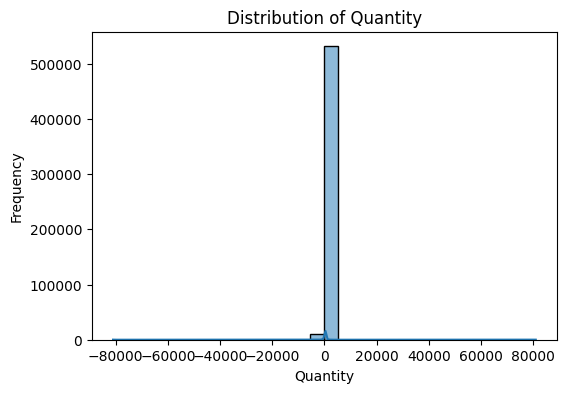

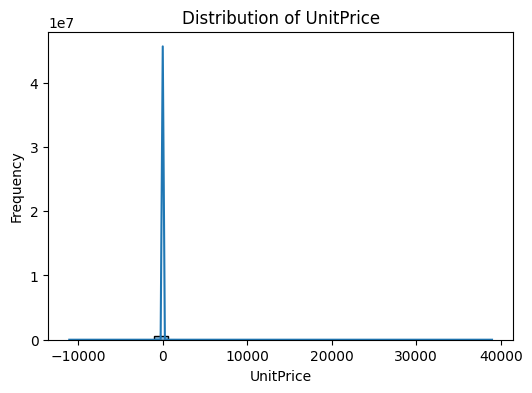

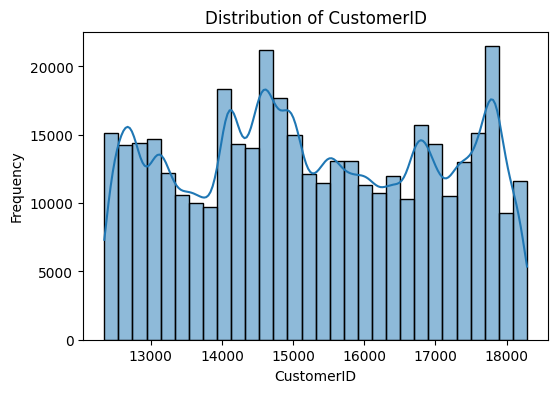

In [8]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


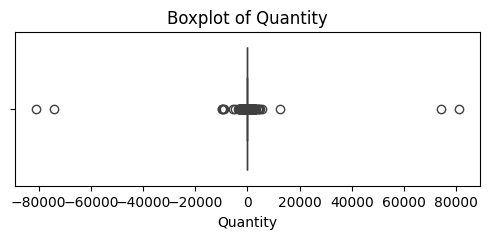

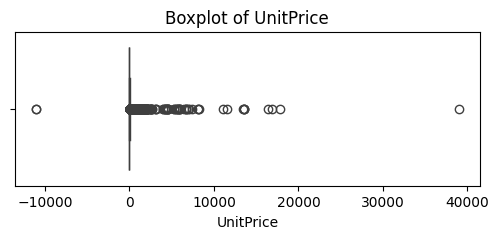

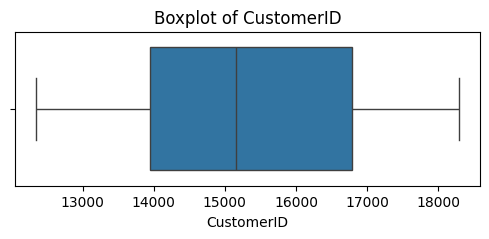

In [9]:
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [11]:
for col in categorical_cols:
    print(f'\nValue counts for {col}:\n')
    print(data_df[col].value_counts(dropna=False))


Value counts for InvoiceNo:

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
581483        1
581566        1
C581499       1
C536383       1
C536379       1
Name: count, Length: 25900, dtype: int64

Value counts for StockCode:

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
85179a       1
23617        1
90214U       1
47591b       1
72802c       1
Name: count, Length: 4070, dtype: int64

Value counts for Description:

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
dotcom adjust                            1
LARGE HEART FLOWERS HOOK                 1
SET 10 CARDS SNOWY ROBIN 17099           1
POLYESTER FILLER PAD 60x40cm             1
mailout                 

Bivariate Analysis

Outlier and Anomaly Detection

Feature Engineering

Initial Hypothesis and Insights

Summary Report